In [4]:
# Class dependencies
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


# Other analysis libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_digits
from matplotlib.animation import FuncAnimation

from jeffutils.utils import reimport, stack_trace
from model import acme
reimport(["from model import acme"], globals())

### 2D plotting functions

In [5]:
def show_probs(model, h = .05, x_size = [-3.5, 3.5], y_size = [-3.5, 3.5]):
    x_min, x_max = x_size[0], x_size[1]
    y_min, y_max = y_size[0], y_size[1]
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid_points, show_probabilities=True)[:,1]
    Z = np.array(predictions).reshape(xx.shape)

    # Plot the decision boundary using a contour plot
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm, levels = 100)
    level_set = plt.contour(xx, yy, Z, levels=[0.5], colors='grey', linestyles='dashed', linewidths=.5)
    plt.clabel(level_set)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha = .5, s=10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # plot a circle around the origin
    circle = plt.Circle((0, 0), 1, color='k', fill=False)
    plt.gca().add_artist(circle)
    plt.show()

    # Plot the 3d plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, 1-Z, cmap='coolwarm')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Probability of being in class 1')
    plt.show()


def plot_boundary(model, title, h = .05, x_size = [-3.5, 3.5], y_size = [-3.5, 3.5]):
    x_min, x_max = x_size[0], x_size[1]
    y_min, y_max = y_size[0], y_size[1]
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid_points)
    Z = np.array(predictions).reshape(xx.shape)

    # Plot the decision boundary using a contour plot
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha = .5, s=10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # plot a circle around the origin
    circle = plt.Circle((0, 0), 1, color='k', fill=False)
    plt.gca().add_artist(circle)
    plt.show()

    predictions_y = np.linalg.norm(grid_points, axis=1)>1
    print("Coverage: ", accuracy_score(predictions, predictions_y))


def animate_boundary(model, title, h = .05, x_size = [-3.5, 3.5], y_size = [-3.5, 3.5]):
    x_min, x_max = x_size[0], x_size[1]
    y_min, y_max = y_size[0], y_size[1]
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Make the figure
    fig = plt.figure(figsize=(6, 6))

    def update(iter):
        print(iter)
        model_used = model.copy()
        model_used.weights = model.weights_history[iter]
        predictions = model_used.predict(grid_points)
        Z = np.array(predictions).reshape(xx.shape)
        plt.clf()
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha = .5, s=10)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f" Iteration: {iter} Validation Accuracy: {model.val_history[iter]}")
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        circle = plt.Circle((0, 0), 1, color='k', fill=False)
        plt.gca().add_artist(circle)
        
    ani = FuncAnimation(fig, update, frames=range(len(model.weights_history)), repeat=False)
    ani.save(title+".mp4")


def animate_weights(model, title):
    model_used = model.copy()
    # Make the figure
    fig = plt.figure(figsize=(6, 6))

    def update(iter):
        weights = model_used.weights_history[iter]
        plt.clf()
        plt.imshow(weights)
        plt.title(f" Iteration: {iter} Validation Accuracy: {model.val_history[iter]}")
        plt.colorbar()
    ani = FuncAnimation(fig, update, frames=range(len(model.weights_history)), repeat=False)
    ani.save(title+".mp4")

epoch:99, loss:-204.8267: 100%|██████████| 1500/1500 [17:06:42<00:00, 41.07s/it]     


[[ 4.44109925  5.56843637]
 [ 5.21191185 -3.58976997]]
0.886


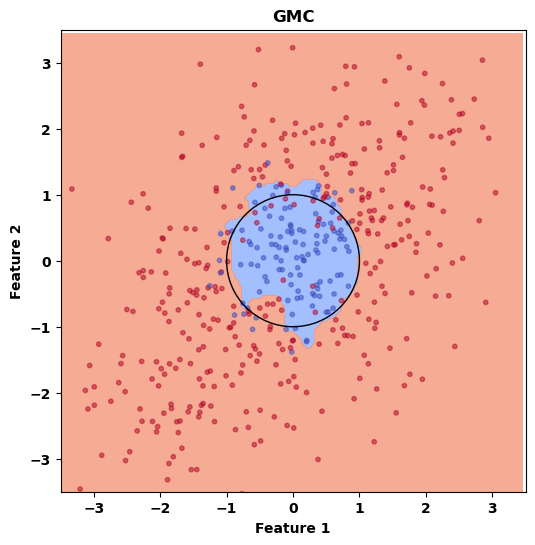

Coverage:  0.985204081632653


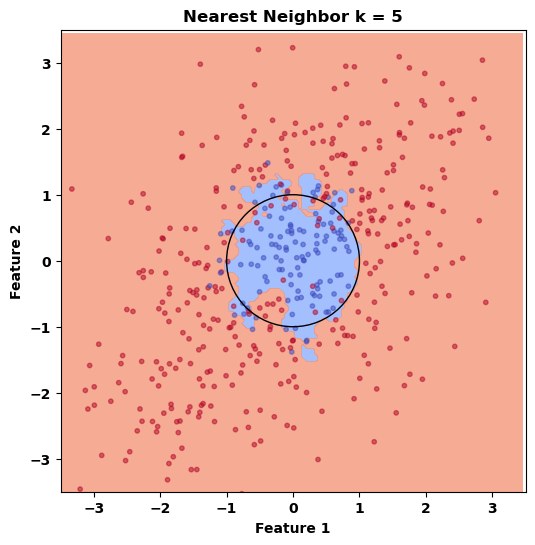

Coverage:  0.9777551020408163


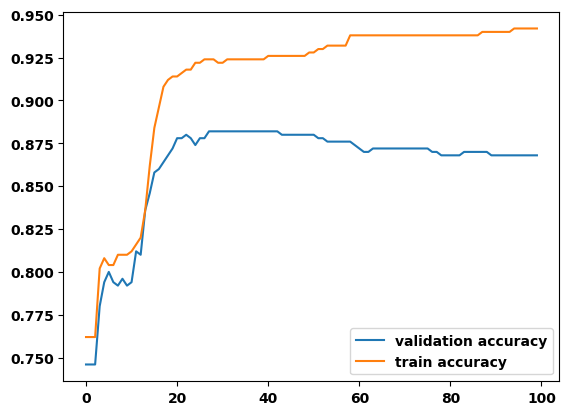

: 

In [7]:
X = np.random.multivariate_normal([0,0], np.array([[2,1],[1,2]]), 1000)
y = np.linalg.norm(X, axis=1)>1
# t = np.arange(0, 2*2*np.pi, 0.1)
# spiral = t[:,np.newaxis]*np.array([np.cos(t), np.sin(t)]).T/5
# distance = np.min(np.linalg.norm(X[:,np.newaxis,:] - spiral[np.newaxis,:,:], axis=2), axis=1)
# y = distance<.25
X += np.random.normal(0, .4, X.shape)

x_val = X[500:]
y_val = y[500:]
X = X[:500]
y = y[:500]


# plt.scatter(X[:,0], X[:,1], c=y)
# plt.plot(spiral[:,0], spiral[:,1])
# plt.show()

test = np.random.multivariate_normal([0,0], np.array([[2,1],[1,2]]), 100)
test_y = np.linalg.norm(test, axis=1)>1

model_toy = acme(learning_rate=.0025, reg = 1, dim_reg = .01, max_iter=50, optimizer="sgd", tol=1e-6)
model_toy.fit(X, y, X_val_set= x_val, y_val_set=y_val)
# print("begin prediction")
# predictions = model.predict(test)
print(model_toy.weights)
# print(accuracy_score(predictions, test_y))

# nearest neighbor
neighbors = 5
knn = KNeighborsClassifier(n_neighbors= neighbors)
knn.fit(X, y)

best_prediction = np.linalg.norm(x_val, axis=1)>1
print(accuracy_score(best_prediction, y_val))

plot_boundary(model_toy, "GMC", h=.05, x_size = [-3.5, 3.5], y_size = [-3.5, 3.5])
plot_boundary(knn, f"Nearest Neighbor k = {neighbors}",h = .05, x_size = [-3.5, 3.5], y_size = [-3.5, 3.5])
plt.plot(model_toy.val_history, label = "validation accuracy")
plt.plot(model_toy.train_history, label = "train accuracy")
plt.legend()
plt.show()

In [189]:
# animation.writer = animation.writers['ffmpeg']
# animate_boundary(model_toy, "GMC Spiral", h=.075, x_size = [-3.5, 3.5], y_size = [-3.5, 3.5])

In [190]:
cov_inv = model_toy.weights.T @ model_toy.weights
cov = np.linalg.inv(cov_inv)
print(cov_inv)
print(cov)
print(cov_inv[0] /cov_inv[1])

[[31392.67982022 20336.10740119]
 [20336.10740119 35945.49582269]]
[[ 5.02826912e-05 -2.84473530e-05]
 [-2.84473530e-05  4.39139422e-05]]
[1.54369168 0.56574842]


In [324]:
# load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# randomly choose a subset of the data
# np.random.seed(29)
n=1000
indices = np.random.choice(X_train_val.shape[0], n, replace=False)
val_indices = np.setdiff1d(np.arange(X_train_val.shape[0]), indices)

X_train = X_train_val[indices]
y_train = y_train_val[indices]
X_val = X_train_val[val_indices]
y_val = y_train_val[val_indices]
model = acme(learning_rate=.01, reg = 1, dim_reg=.1, tol = 1e-5, optimizer="sgd", batch_size=64, epochs=20)
model.fit(X_train, y_train, X_val_set= X_train_val, y_val_set= y_train_val)

gmc_predictions = model.predict(X_test)

# nearest neighbor
neighbors = 2
knn = KNeighborsClassifier(n_neighbors= neighbors)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

  0%|          | 0/300 [00:00<?, ?it/s]

epoch:19, loss:-8606.9145: 100%|██████████| 300/300 [01:31<00:00,  3.26it/s] 


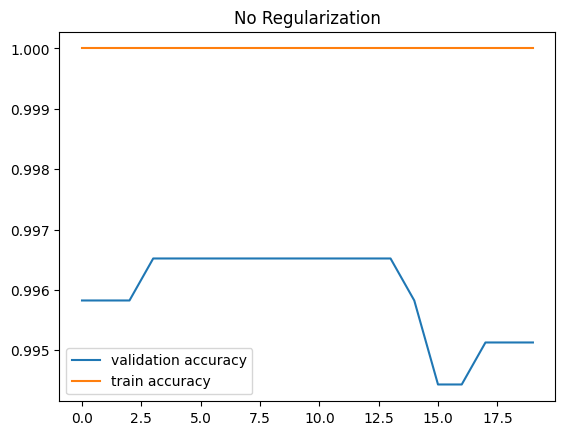

GMC Accuracy: 0.9777777777777777
KNN Accuracy: 0.9611111111111111
Random Forest Accuracy: 0.975
XGBoost Accuracy: 0.9527777777777777


In [329]:
plt.title("No Regularization")
plt.plot(model.val_history, label = "validation accuracy")
plt.plot(model.train_history, label = "train accuracy")
plt.legend()
plt.show()

model.weights = model.weights_history[-1]

gmc_predictions = model.predict(X_test)


# random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# xgboost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)


print("GMC Accuracy:",accuracy_score(gmc_predictions, y_test))
print("KNN Accuracy:",accuracy_score(knn_predictions, y_test))
print("Random Forest Accuracy:", accuracy_score(rf_predictions, y_test))
print("XGBoost Accuracy:", accuracy_score(xgb_predictions, y_test))


# # confusion matrix
# confusion_matrix(y_test, gmc_predictions)
# confusion_matrix(y_test, knn_predictions)
# confusion_matrix(y_test, xgb_predictions)
# confusion_matrix(y_test, rf_predictions)

In [193]:
model_reg = acme(learning_rate=.2, reg = 0, optimizer="grad", max_iter=1000)
model_reg.fit(X_train, y_train, X_val_set= X_train_val, y_val_set= y_train_val)
gmc_predictions_reg = model_reg.predict(X_test)

(10) Val Accuracy: 0.95964.   Train Accuracy: 1.0
(20) Val Accuracy: 0.95685.   Train Accuracy: 1.0


In [194]:
iter = 0
model_reg.weights = model_reg.weights_history[iter]

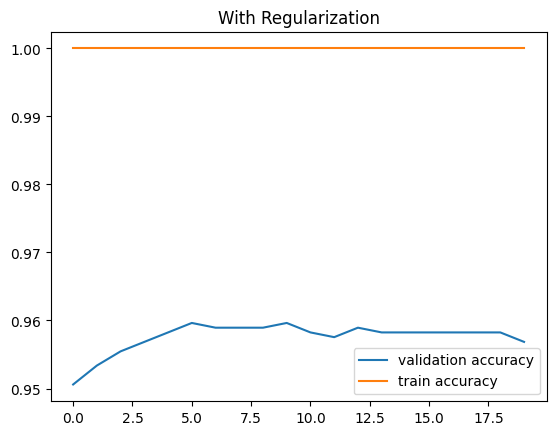

GMC Reg Accuracy: 0.9555555555555556
KNN Accuracy: 0.9361111111111111
Random Forest Accuracy: 0.9305555555555556


In [195]:
plt.title("With Regularization")
plt.plot(model_reg.val_history, label = "validation accuracy")
plt.plot(model_reg.train_history, label = "train accuracy")
plt.legend()
plt.show()

iter = -1
model_reg.weights = model_reg.weights_history[iter]
gmc_predictions_reg = model_reg.predict(X_test)
print("GMC Reg Accuracy:",accuracy_score(gmc_predictions_reg, y_test))
print("KNN Accuracy:",accuracy_score(knn_predictions, y_test))
print("Random Forest Accuracy:", accuracy_score(rf_predictions, y_test))
#print("XGBoost Accuracy:", accuracy_score(xgb_predictions, y_test))

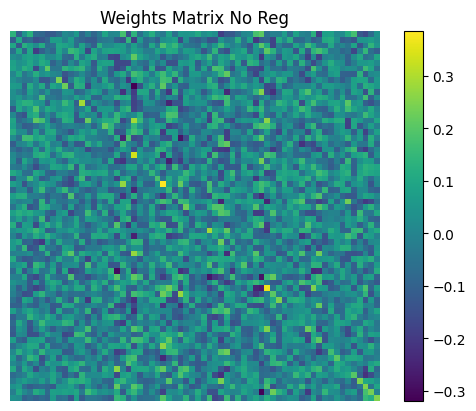

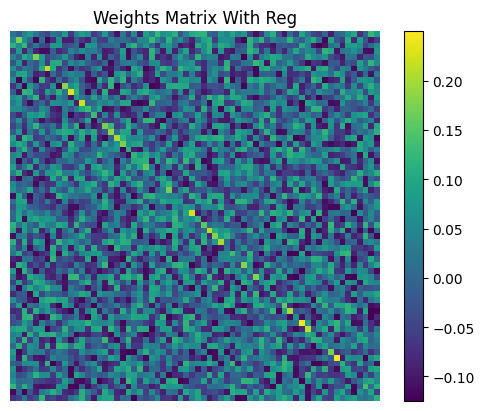

In [196]:
weights = model_reg.weights
reg_weights = model.weights

plt.title("Weights Matrix No Reg")
plt.imshow(weights)
plt.colorbar()
plt.axis('off')
plt.show()

plt.title("Weights Matrix With Reg")
plt.imshow(reg_weights)
plt.colorbar()
plt.axis('off')
plt.show()

Rank of not reg matrix: 60
Rank of reg matrix: 60
Rank of random matrix: 61


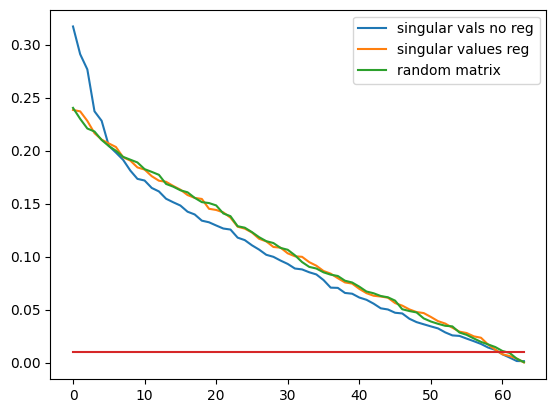

In [197]:
lim = 1e-2
u,s,v  = np.linalg.svd(weights / np.linalg.norm(weights))
rank = np.sum(s > lim)
print("Rank of not reg matrix:", rank)

u_reg,s_reg,v_reg  = np.linalg.svd(reg_weights/ np.linalg.norm(reg_weights))
rank_reg = np.sum(s_reg > lim)
print("Rank of reg matrix:", rank_reg)

rand_mat = np.random.random((64,64))*2 - 1
rand_mat = rand_mat / np.linalg.norm(rand_mat)
u_rand, s_rand, v_rand = np.linalg.svd(rand_mat)
rank_rand = np.sum(s_rand > lim)
print("Rank of random matrix:", rank_rand)



plt.plot(s, label = "singular vals no reg")
plt.plot(s_reg, label='singular values reg')
plt.plot(s_rand, label = "random matrix")
plt.plot(np.ones(64)*lim)
plt.legend()
plt.show()

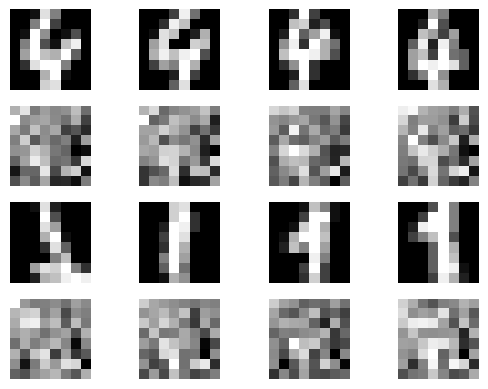

In [198]:
# show an image of the train data
target = [4,1]
count = 4
reg = False

plt.figure()
for i,t in enumerate(target):
    index = 0
    success = 0
    while success < count:

        
        if y_train[index] == t:
            plt.subplot(2*len(target),count,2*i*count+success+1)
            plt.imshow(X_train[index].reshape(8,8), cmap='gray')
            plt.axis('off')
            plt.subplot(2*len(target),count,2*i*count+count+success+1)
            if reg == True:
                weights = model_reg.weights
            else:
                weights = model.weights
            plt.imshow((weights @ X_train[index]).reshape(8,8), cmap='gray')
            plt.axis('off')
            success += 1
        index += 1
        
plt.show()

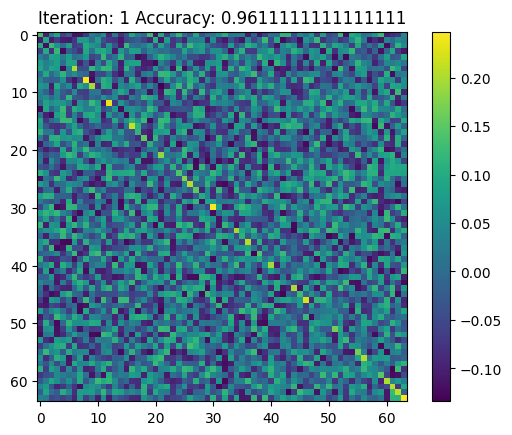

In [202]:
iter = 1

model_copy = model_reg.copy()
model_copy.weights = model_copy.weights_history[iter]
y_preds = model_copy.predict(X_test)
accuracy = accuracy_score(y_preds, y_test)


plt.title(f"Iteration: {iter} Accuracy: {accuracy}")
plt.imshow(model_copy.weights)
plt.colorbar()
plt.show()

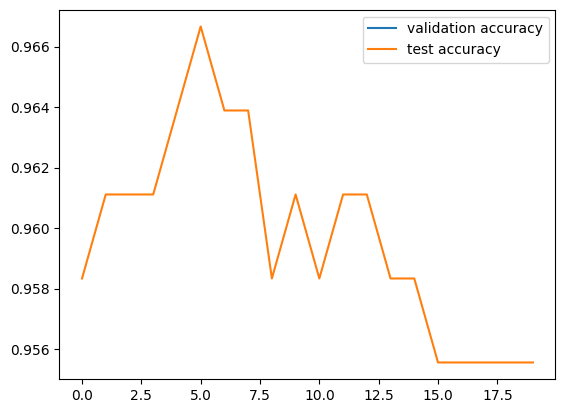

In [207]:
model_temp = model_reg.copy()
test_score =[]
for i in range(len(model_temp.weights_history)):
    model_temp.weights = model_temp.weights_history[i]
    predictions = model_temp.predict(X_test)
    test_score.append(accuracy_score(predictions, y_test))


plt.plot(model.val_history, label = "validation accuracy")
plt.plot(test_score, label = "test accuracy")
plt.legend()
plt.show()